<a href="https://colab.research.google.com/github/s8narnor/python-random-quote/blob/master/Exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
!pip install -q keras

In [3]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
img_width, img_height = 150,150
train_data_dir = '/content/drive/My Drive/PlantVillage'
validation_data_dir = '/content/drive/My Drive/PlantVillage'
batch_size = 32

In [5]:
datagen = ImageDataGenerator(
    rescale =1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    validation_split = 0.4)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    subset = "training",
    class_mode = 'categorical')

val_datagen =ImageDataGenerator(rescale = 1./255)

validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    subset = "validation",
    class_mode = 'categorical')

Found 12395 images belonging to 15 classes.
Found 8252 images belonging to 15 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32,kernel_size =3, activation='relu', input_shape = (150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(32,kernel_size =3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,kernel_size =3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(64,kernel_size =3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2,2)))
model.add(Dropout(0.3))
#output values will not be in single dir
model.add(Flatten())
model.add(Dense(512, activation ='relu'))
model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation ='softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)       

In [8]:

rms = keras.optimizers.RMSprop(learning_rate=0.05, rho = 0.9)

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['categorical_accuracy'])

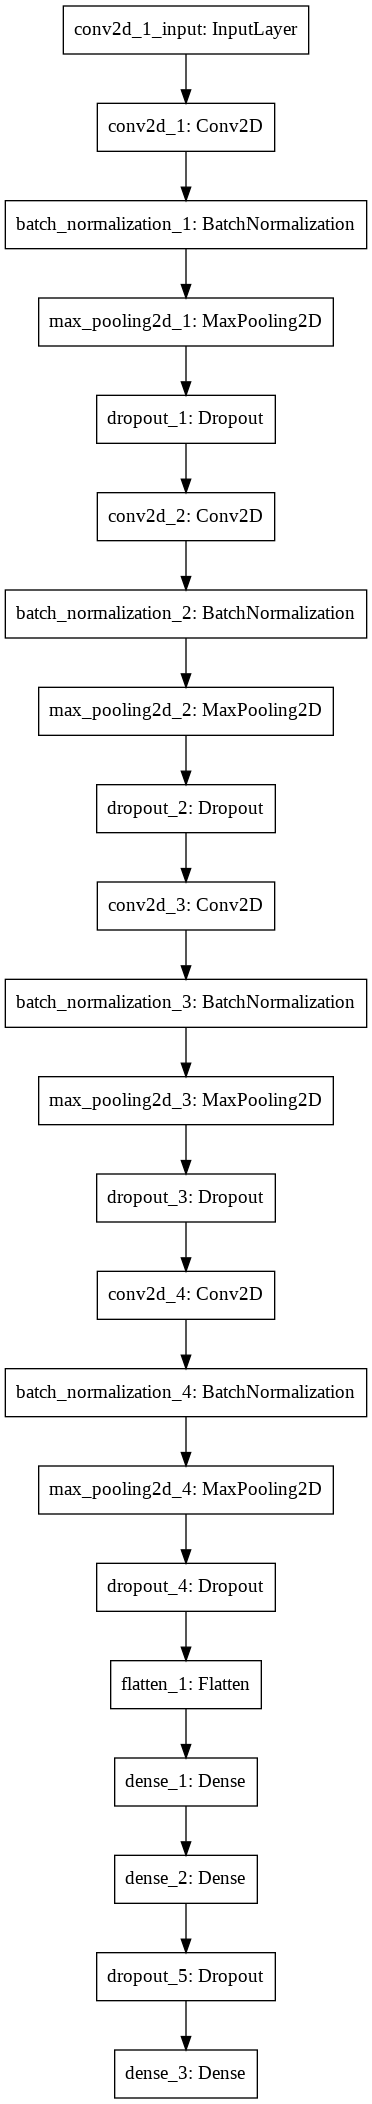

In [9]:
from keras.utils import plot_model
plot_model(model, to_file = 'model.png')

In [10]:
from keras.callbacks import History
history = History()
model.fit_generator(
    train_generator,
    steps_per_epoch =388,
    epochs =20, verbose =1, callbacks=[history],
    validation_data=validation_generator,
    validation_steps =258)

Epoch 1/20
388/388 [==============================] - 7704s 20s/step - loss: 2.1719 - categorical_accuracy: 0.3219 - val_loss: 14.5208 - val_categorical_accuracy: 0.1205
Epoch 2/20
388/388 [==============================] - 157s 404ms/step - loss: 1.5706 - categorical_accuracy: 0.5086 - val_loss: 7.4097 - val_categorical_accuracy: 0.1888
Epoch 3/20
388/388 [==============================] - 157s 404ms/step - loss: 1.2887 - categorical_accuracy: 0.5888 - val_loss: 1.6288 - val_categorical_accuracy: 0.4358
Epoch 4/20
388/388 [==============================] - 158s 407ms/step - loss: 1.1185 - categorical_accuracy: 0.6426 - val_loss: 2.6593 - val_categorical_accuracy: 0.3822
Epoch 5/20
388/388 [==============================] - 158s 408ms/step - loss: 0.9912 - categorical_accuracy: 0.6784 - val_loss: 1.4483 - val_categorical_accuracy: 0.6048
Epoch 6/20
388/388 [==============================] - 157s 404ms/step - loss: 0.9191 - categorical_accuracy: 0.7061 - val_loss: 9.4568 - val_categoric

In [11]:
model.save('kcnn_model.h5')

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])


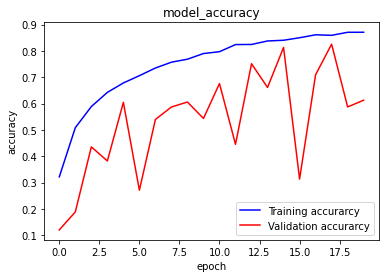

In [12]:
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['categorical_accuracy'],'b', label='Training accurarcy')
plt.plot(history.history['val_categorical_accuracy'], 'r', label='Validation accurarcy')
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

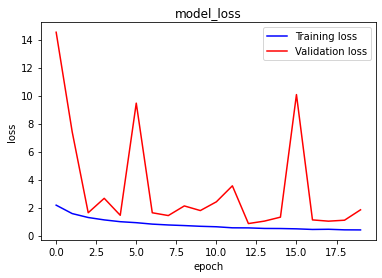

In [13]:
plt.plot(history.history['loss'],'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG to 00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG
00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG
[[2.922183e-29 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
